In [92]:
import torch
from torchvision import transforms
import numpy as np
import scipy.io 
from PIL import Image
import matplotlib.pyplot as plt
import cv2 as cv
import sklearn
from sklearn.metrics import mean_squared_error


In [93]:
FILE_PATH = "/Users/fnayres/upenn/Full-dose-Whole-body-PET-Synthesis-from-Low-dose-PET-Using-Consistency-Model/results_normalized01/inference/synthesized_Patient_slice2.mat"

Image shape: (96, 192)
Total number of pixels: 18432
Min value: -1.0
Max value: 1.0
Mean value: -0.9569053649902344
Standard deviation: 0.15517665445804596


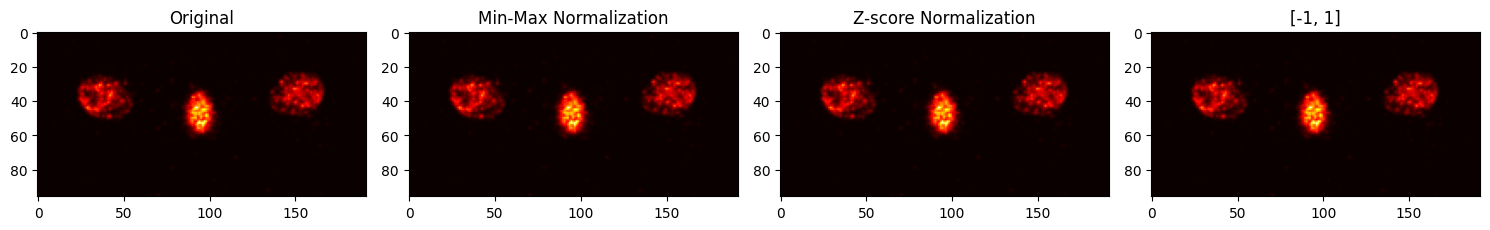

Original: 0.908091
Min-Max Normalization: 0.963390
Z-score Normalization: 1.629394
[-1, 1] Normalization: 0.000000

Best normalization method: [-1, 1] with MSE of 0.000000


In [94]:
data = scipy.io.loadmat(FILE_PATH)

img_shape = data['low_dose_input'].shape
total_pixels = img_shape[0] * img_shape[1]
print(f"Image shape: {img_shape}")
print(f"Total number of pixels: {total_pixels}")

print(f"Min value: {np.min(data['low_dose_input'])}")
print(f"Max value: {np.max(data['low_dose_input'])}")
print(f"Mean value: {np.mean(data['low_dose_input'])}")
print(f"Standard deviation: {np.std(data['low_dose_input'])}")


min_max_norm = (data['low_dose_input'] - np.min(data['low_dose_input'])) / (np.max(data['low_dose_input']) - np.min(data['low_dose_input']))

z_norm = (data['low_dose_input'] - np.mean(data['low_dose_input'])) / np.std(data['low_dose_input'])

one_one = 2 * ((data['low_dose_input'] - np.min(data['low_dose_input'])) / (np.max(data['low_dose_input']) - np.min(data['low_dose_input']))) - 1




fig, axes = plt.subplots(1, 4, figsize=(15, 100))
axes[0].imshow(data['low_dose_input'], cmap='hot')
axes[0].set_title('Original')
axes[1].imshow(min_max_norm, cmap='hot')
axes[1].set_title('Min-Max Normalization')
axes[2].imshow(z_norm, cmap='hot')
axes[2].set_title('Z-score Normalization')
axes[3].imshow(one_one, cmap='hot')
axes[3].set_title('[-1, 1]')
plt.tight_layout()
plt.show()



original_mse = mean_squared_error(data['low_dose_input'].flatten(), data['image'].flatten())
min_max_mse = mean_squared_error(min_max_norm.flatten(), data['low_dose_input'].flatten())
z_norm_mse = mean_squared_error(z_norm.flatten(), data['low_dose_input'].flatten())
one_one_mse = mean_squared_error(one_one.flatten(), data['low_dose_input'].flatten())

#print("MSE comparison between normalized low-dose and full-dose images:")
print(f"Original: {original_mse:.6f}")
print(f"Min-Max Normalization: {min_max_mse:.6f}")
print(f"Z-score Normalization: {z_norm_mse:.6f}")
print(f"[-1, 1] Normalization: {one_one_mse:.6f}")

methods = ["Original", "Min-Max", "Z-score", "[-1, 1]"]
mse_values = [original_mse, min_max_mse, z_norm_mse, one_one_mse]
best_method_index = mse_values.index(min(mse_values))
print(f"\nBest normalization method: {methods[best_method_index]} with MSE of {min(mse_values):.6f}")




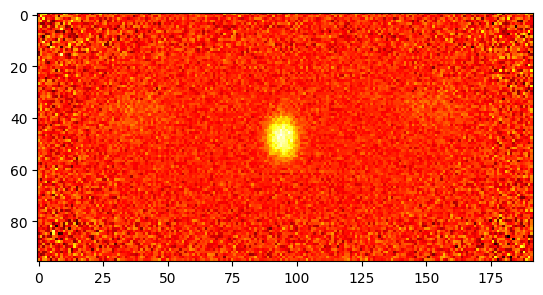

In [95]:
image = scipy.io.loadmat(FILE_PATH)
plt.imshow(image['image'], interpolation='nearest', cmap='hot')
plt.show()

In [96]:
import os

DATA_DIR = "/Users/fnayres/upenn/Full-dose-Whole-body-PET-Synthesis-from-Low-dose-PET-Using-Consistency-Model/halfdataset/train/"
files = os.listdir(DATA_DIR)[:]  

all_min_low = []
all_max_low = []
all_mean_low = []
all_std_low = []
all_min_full = []
all_max_full = []
all_mean_full = []
all_std_full = []

for i, file in enumerate(files):
    if file.endswith('.mat'):
        try:
            file_path = os.path.join(DATA_DIR, file)
            full_image = scipy.io.loadmat(file_path)['img']
            
            low_dose = full_image[:,0:128,:]
            full_dose = full_image[:,128:256,:]
            
            if low_dose.shape[0] == 1:
                low_dose = np.squeeze(low_dose, axis=0)
                full_dose = np.squeeze(full_dose, axis=0)
            
            all_min_low.append(np.min(low_dose))
            all_max_low.append(np.max(low_dose))
            all_mean_low.append(np.mean(low_dose))
            all_std_low.append(np.std(low_dose))
            
            all_min_full.append(np.min(full_dose))
            all_max_full.append(np.max(full_dose))
            all_mean_full.append(np.mean(full_dose))
            all_std_full.append(np.std(full_dose))
            
            print(f"Processed {i+1}/{len(files)}: {file}")
        except Exception as e:
            print(f"Error processing {file}: {e}")

print("\nAggregate Low-dose Statistics:")
print(f"Min values range: {np.min(all_min_low):.4f} to {np.max(all_min_low):.4f}")
print(f"Max values range: {np.min(all_max_low):.4f} to {np.max(all_max_low):.4f}")
print(f"Mean values range: {np.min(all_mean_low):.4f} to {np.max(all_mean_low):.4f}")
print(f"Std values range: {np.min(all_std_low):.4f} to {np.max(all_std_low):.4f}")

print("\nAggregate Full-dose Statistics:")
print(f"Min values range: {np.min(all_min_full):.4f} to {np.max(all_min_full):.4f}")
print(f"Max values range: {np.min(all_max_full):.4f} to {np.max(all_max_full):.4f}")
print(f"Mean values range: {np.min(all_mean_full):.4f} to {np.max(all_mean_full):.4f}")
print(f"Std values range: {np.min(all_std_full):.4f} to {np.max(all_std_full):.4f}")

Processed 1/5440: 100_07012022_1_20220107_160754_116.mat
Processed 2/5440: 100_04012022_1_20220104_143639_49.mat
Processed 3/5440: 100_230522_3_20220523_170535_78.mat
Processed 4/5440: 100_08062022_2_20220608_151511_31.mat
Processed 5/5440: 100_070722_3_20220707_164103_121.mat
Processed 6/5440: 100_03012022_1_20220103_141016_111.mat
Processed 7/5440: 100_20220620_3_20220621_165939_119.mat
Processed 8/5440: 100_130622_1_20220613_133038_60.mat
Processed 9/5440: 100_18012022_2_20220118_170500_100.mat
Processed 10/5440: 100_150722_2_20220715_160427_70.mat
Processed 11/5440: 100_070722_2_20220707_163946_123.mat
Processed 12/5440: 100_100622_2_20220610_163500_124.mat
Processed 13/5440: 100_01122021_3_20211201_164209_23.mat
Processed 14/5440: 100_18112021_2_20211118_164511_64.mat
Processed 15/5440: 100_130622_3_20220613_133211_38.mat
Processed 16/5440: 100_18012022_2_20220118_170500_28.mat
Processed 17/5440: 100_20220704_1_20220705_172845_6.mat
Processed 18/5440: 100_130622_4_20220613_133323_